## Regression Model by ANN 

In [155]:
#importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [156]:
#installing libraries from pip package
!pip install keras
!pip install tensorflow

In [157]:
import tensorflow as tf
import keras

In [158]:
#importing dataset
dataset = pd.read_excel('Folds5x2_pp.xlsx')

In [159]:
dataset.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [160]:
#we will check if there are any null values in the dataset
dataset.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [161]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [162]:
#divding our dataset into X and Y
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values

In [163]:
X.shape,Y.shape

((9568, 4), (9568,))

In [164]:
# splitting into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [165]:
#scaling our data
from sklearn.preprocessing import StandardScaler
#initializing scaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# EDA (Exploratory Data Analysis)

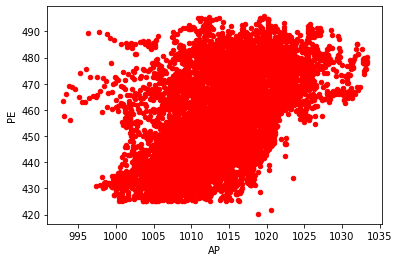

In [166]:
dataset.plot(kind='scatter',x='AP',y='PE',color='red')
plt.show()

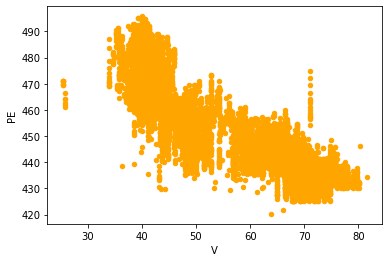

In [180]:
dataset.plot(kind='scatter',x='V',y='PE',color='orange')
plt.show()

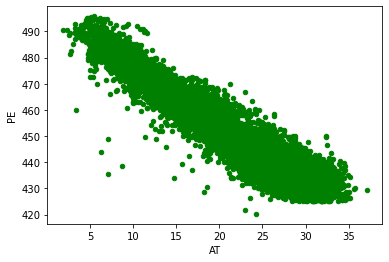

In [168]:
dataset.plot(kind='scatter',x='AT',y='PE',color='green')
plt.show()

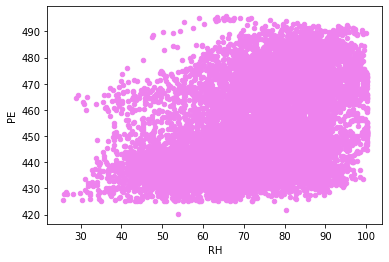

In [181]:
dataset.plot(kind='scatter',x='RH',y='PE',color='violet')
plt.show()

# Buiding the ANN model

In [170]:
#initializing the model
Model=keras.models.Sequential()

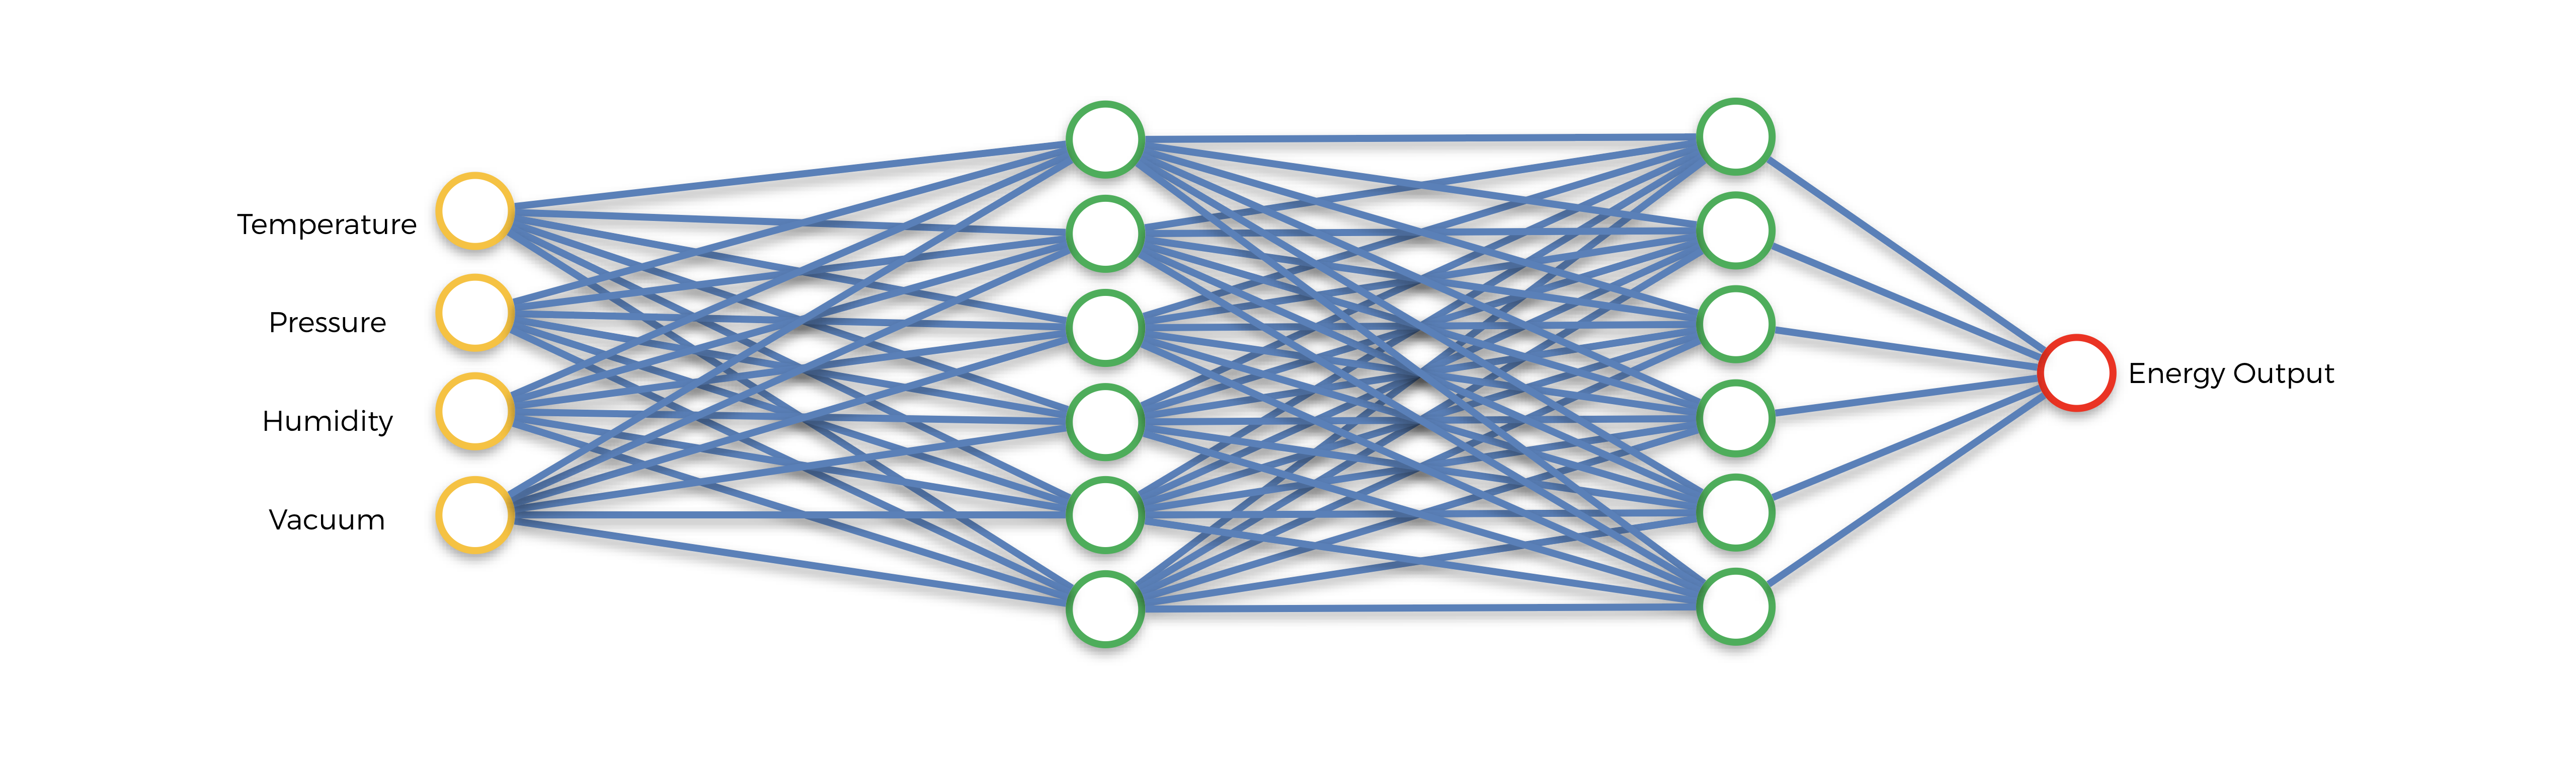

In [171]:
#adding input and first hidden layer
Model.add(keras.layers.Dense(6,activation='relu'))
#adding second hidden layer
Model.add(keras.layers.Dense(6,activation='relu'))

In [172]:
#adding output layer
Model.add(keras.layers.Dense(1,activation=None))    # for regression model activation fucntion should be None
                                                    # for classification of 2 classes should be Sigmoid and
                                                    # for classification of more than 2 classes should be softmax

# Model Training

In [173]:
Model.compile(optimizer='adam',loss='mean_squared_error')

In [174]:
%%time
model_his=Model.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
240/240 [==============================] - 1s 984us/step - loss: 205434.6562
Epoch 2/100
240/240 [==============================] - 0s 993us/step - loss: 195199.9375
Epoch 3/100
240/240 [==============================] - 0s 986us/step - loss: 163857.5625
Epoch 4/100
240/240 [==============================] - 0s 982us/step - loss: 112552.3906
Epoch 5/100
240/240 [==============================] - 0s 1ms/step - loss: 64351.5664
Epoch 6/100
240/240 [==============================] - 0s 1ms/step - loss: 35004.2188
Epoch 7/100
240/240 [==============================] - 0s 1ms/step - loss: 20250.5938
Epoch 8/100
240/240 [==============================] - 0s 1ms/step - loss: 13325.5352
Epoch 9/100
240/240 [==============================] - 0s 997us/step - loss: 9810.8418
Epoch 10/100
240/240 [==============================] - 0s 993us/step - loss: 7389.0425
Epoch 11/100
240/240 [==============================] - 0s 971us/step - loss: 5465.2808
Epoch 12/100
240/240 [===============

240/240 [==============================] - 0s 977us/step - loss: 19.5258
Epoch 97/100
240/240 [==============================] - 0s 1ms/step - loss: 19.5513
Epoch 98/100
240/240 [==============================] - 0s 978us/step - loss: 19.6055
Epoch 99/100
240/240 [==============================] - 0s 984us/step - loss: 19.4405
Epoch 100/100
240/240 [==============================] - 0s 996us/step - loss: 19.5609
CPU times: total: 38.6 s
Wall time: 24.9 s


In [175]:
# summary
Model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 6)                 30        
                                                                 
 dense_16 (Dense)            (None, 6)                 42        
                                                                 
 dense_17 (Dense)            (None, 1)                 7         
                                                                 
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


# Model testing

In [176]:
#predicting test valures
y_pred=Model.predict(x_test)

60/60 [==============================] - 0s 820us/step


In [177]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[455.63 455.27]
 [437.54 436.31]
 [432.95 440.68]
 ...
 [482.97 479.53]
 [434.36 435.76]
 [458.61 457.1 ]]


# Plotting Model error

In [178]:
# plot
def plot_learningcurve(his,epochs):
    epoch=range(1,epochs+1)  
    # loss
    plt.plot(epoch, his.history['loss'])
    plt.title('Model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

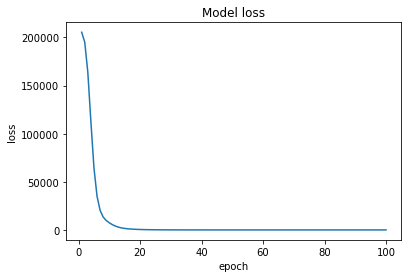

In [179]:
plot_learningcurve(model_his,100)